<a href="https://colab.research.google.com/github/sevcikoleksandr233/machine-learning/blob/main/%D0%A8%D0%B5%D0%B2%D1%87%D0%B8%D0%BA_%D0%BF%D1%80_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Завдання 1.
# 1. Вивести перших 5 рядків

import pandas as pd
import numpy as np
import seaborn as sns

# Завантаження таблиць з Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

df = pd.read_html(url, header=0)[2]
print("Перших 5 рядків таблиці:")
df.head(5)


Перших 5 рядків таблиці:


,Country/Territory,IMF[1][13],IMF[1][13].1,World Bank[14],World Bank[14].1,United Nations[15],United Nations[15].1
0,Country/Territory,Forecast,Year,Estimate,Year,Estimate,Year
1,World,109529216,2024,105435540,2023,100834796,2022
2,United States,28781083,2024,27360935,2023,25744100,2022
3,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
4,Germany,4591100,2024,4456081,2023,4076923,2022


In [2]:
# 2. Визначити розмір датасета
df.shape

(211, 7)

In [3]:
# Визначити оптимальну кількість стовпців
num_columns = len(df.columns)
num_columns

7

In [4]:
# Змініть назви стовпців відповідно до їх кількості
df.columns = ['Country', 'IMF_Forecast_2024', 'IMF_Year', 'WorldBank_Estimate_2023', 'WorldBank_Year', 'UN_Estimate_2022', 'Extra_Column']
df.columns


Index(['Country', 'IMF_Forecast_2024', 'IMF_Year', 'WorldBank_Estimate_2023',
       'WorldBank_Year', 'UN_Estimate_2022', 'Extra_Column'],
      dtype='object')

In [5]:
# 5. Визначити тип даних
for column in df.columns:
    print(df[column].apply(type).value_counts())
    print()

Country
<class 'str'>    211
Name: count, dtype: int64

IMF_Forecast_2024
<class 'str'>    211
Name: count, dtype: int64

IMF_Year
<class 'str'>    211
Name: count, dtype: int64

WorldBank_Estimate_2023
<class 'str'>    211
Name: count, dtype: int64

WorldBank_Year
<class 'str'>    211
Name: count, dtype: int64

UN_Estimate_2022
<class 'str'>    211
Name: count, dtype: int64

Extra_Column
<class 'str'>    211
Name: count, dtype: int64



In [6]:
# 6. Замінити "—" на NaN і перевірити наявність пропущених значень
df = pd.read_html(url, header=0)[2]
df.replace(['—', '–'], np.nan, inplace=True)
df.columns = ['Country', 'IMF_Forecast_2024', 'IMF_Year', 'WorldBank_Estimate_2023', 'WorldBank_Year', 'UN_Estimate_2022', 'Extra_Column']
df[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']] = df[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']].apply(pd.to_numeric, errors='coerce')

print("Пропущені значення до заповнення:")
print(df.isna().sum())

df[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']] = df[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']].fillna(df[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']].mean())

df['IMF_Year'].fillna(df['IMF_Year'].mode()[0], inplace=True)
df['WorldBank_Year'].fillna(df['WorldBank_Year'].mode()[0], inplace=True)
df['Extra_Column'].fillna(df['Extra_Column'].mode()[0], inplace=True)

print("Пропущені значення після заповнення:")
print(df.isna().sum())


Пропущені значення до заповнення:
Country                     0
IMF_Forecast_2024          16
IMF_Year                   15
WorldBank_Estimate_2023     9
WorldBank_Year              8
UN_Estimate_2022            2
Extra_Column                1
dtype: int64
Пропущені значення після заповнення:
Country                    0
IMF_Forecast_2024          0
IMF_Year                   0
WorldBank_Estimate_2023    0
WorldBank_Year             0
UN_Estimate_2022           0
Extra_Column               0
dtype: int64


In [7]:
# 7. Ще раз перевірити наявність пропущених значень.
print("Пропущені значення після заповнення:")
print(df.isna().sum())

Пропущені значення після заповнення:
Country                    0
IMF_Forecast_2024          0
IMF_Year                   0
WorldBank_Estimate_2023    0
WorldBank_Year             0
UN_Estimate_2022           0
Extra_Column               0
dtype: int64


In [8]:
# 8. Перевірити наявність дублікатів. При наявності видалити дублікати.
print("Кількість дублікатів:")
print(df.duplicated().sum())

# Видалення дублікатів
df.drop_duplicates(inplace=True)

print("Кількість дублікатів після видалення:")
print(df.duplicated().sum())


Кількість дублікатів:
0
Кількість дублікатів після видалення:
0


In [9]:
# 9. Вивести описову статистику датасету describe()
describe_df = df.describe(include='all')

# Форматування описової статистики
def format_stats(stats_df):
    formatted_df = stats_df.copy()
    for col in formatted_df.select_dtypes(include=[np.number]).columns:
        formatted_df[col] = formatted_df[col].apply(lambda x: "{:,.0f}".format(x) if not pd.isna(x) else x)
    return formatted_df

formatted_describe_df = format_stats(describe_df)
formatted_describe_df

,Country,IMF_Forecast_2024,IMF_Year,WorldBank_Estimate_2023,WorldBank_Year,UN_Estimate_2022,Extra_Column
count,211,211,211,211,211,211,211
unique,211,NaN,13,NaN,10,NaN,10
top,Country/Territory,NaN,2024,NaN,2023,NaN,2022
freq,1,NaN,197,NaN,188,NaN,202
mean,NaN,"1,123,228",NaN,"1,037,206",NaN,"961,270",NaN
std,NaN,"7,881,873",NaN,"7,583,954",NaN,"7,258,265",NaN
min,NaN,66,NaN,62,NaN,59,NaN
25%,NaN,"14,828",NaN,"10,446",NaN,"9,084",NaN
50%,NaN,"68,006",NaN,"43,627",NaN,"32,488",NaN
75%,NaN,"450,340",NaN,"344,686",NaN,"244,238",NaN


In [10]:
# 10.Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?
df['Difference'] = df['IMF_Forecast_2024'] - df['WorldBank_Estimate_2023']

country_max_diff = df.loc[df['Difference'].idxmax(), 'Country']
country_min_diff = df.loc[df['Difference'].idxmin(), 'Country']

(country_max_diff, country_min_diff)


('World', 'South Sudan')

In [11]:
# 11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?
correlation = df[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']].corr()
correlation


,IMF_Forecast_2024,WorldBank_Estimate_2023,UN_Estimate_2022
IMF_Forecast_2024,1.000000,0.999351,0.999246
WorldBank_Estimate_2023,0.999351,1.000000,0.999656
UN_Estimate_2022,0.999246,0.999656,1.000000


In [12]:
# 12.Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?
mean_values = df[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']].mean()
formatted_means = mean_values.apply(lambda x: "{:,.0f}".format(x))
formatted_means


,0
IMF_Forecast_2024,"1,123,228"
WorldBank_Estimate_2023,"1,037,206"
UN_Estimate_2022,"961,270"


In [13]:
# 13.Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?
df['StdDev'] = df[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']].std(axis=1)
df.loc[df['StdDev'].idxmax(), 'Country']


'World'

In [14]:
# 14.Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).
df.loc[df['IMF_Forecast_2024'].idxmax(), 'Country'], df.loc[df['IMF_Forecast_2024'].idxmin(), 'Country']
df.loc[df['WorldBank_Estimate_2023'].idxmax(), 'Country'], df.loc[df['WorldBank_Estimate_2023'].idxmin(), 'Country']
df.loc[df['UN_Estimate_2022'].idxmax(), 'Country'], df.loc[df['UN_Estimate_2022'].idxmin(), 'Country']


('World', 'Tuvalu')

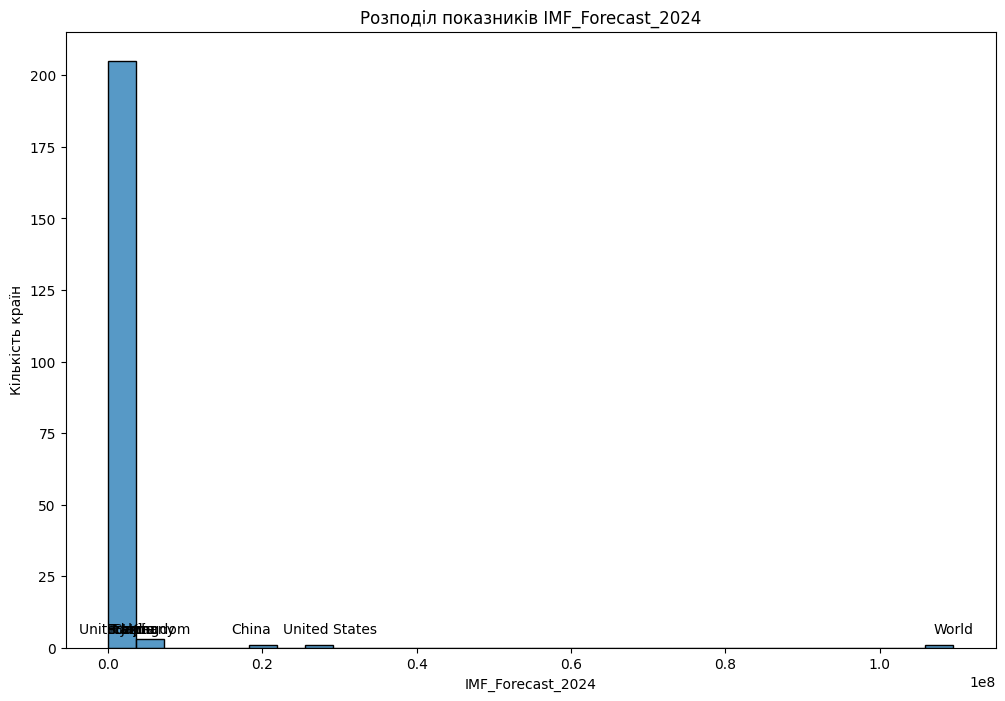

In [16]:
# 15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(df['IMF_Forecast_2024'].dropna(), bins=30, kde=False)
plt.title('Розподіл показників IMF_Forecast_2024')
plt.xlabel('IMF_Forecast_2024')
plt.ylabel('Кількість країн')

# Додаємо анотації для крайніх значень
top_countries = df[['Country', 'IMF_Forecast_2024']].dropna().sort_values(by='IMF_Forecast_2024', ascending=False).head(10)
for i, row in top_countries.iterrows():
    plt.annotate(row['Country'], (row['IMF_Forecast_2024'], 0), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


In [17]:
# 16.Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?
total_imf = df['IMF_Forecast_2024'].sum()
total_wb = df['WorldBank_Estimate_2023'].sum()
total_un = df['UN_Estimate_2022'].sum()

df['IMF_Forecast_2024_fraction'] = df['IMF_Forecast_2024'] / total_imf
df['WorldBank_Estimate_2023_fraction'] = df['WorldBank_Estimate_2023'] / total_wb
df['UN_Estimate_2022_fraction'] = df['UN_Estimate_2022'] / total_un

df[['Country', 'IMF_Forecast_2024_fraction', 'WorldBank_Estimate_2023_fraction', 'UN_Estimate_2022_fraction']].head()


,Country,IMF_Forecast_2024_fraction,WorldBank_Estimate_2023_fraction,UN_Estimate_2022_fraction
0,Country/Territory,0.004739,0.004739,0.004739
1,World,0.462147,0.481770,0.497145
2,United States,0.121439,0.125021,0.126926
3,China,0.078196,0.081310,0.088564
4,Germany,0.019372,0.020361,0.020100


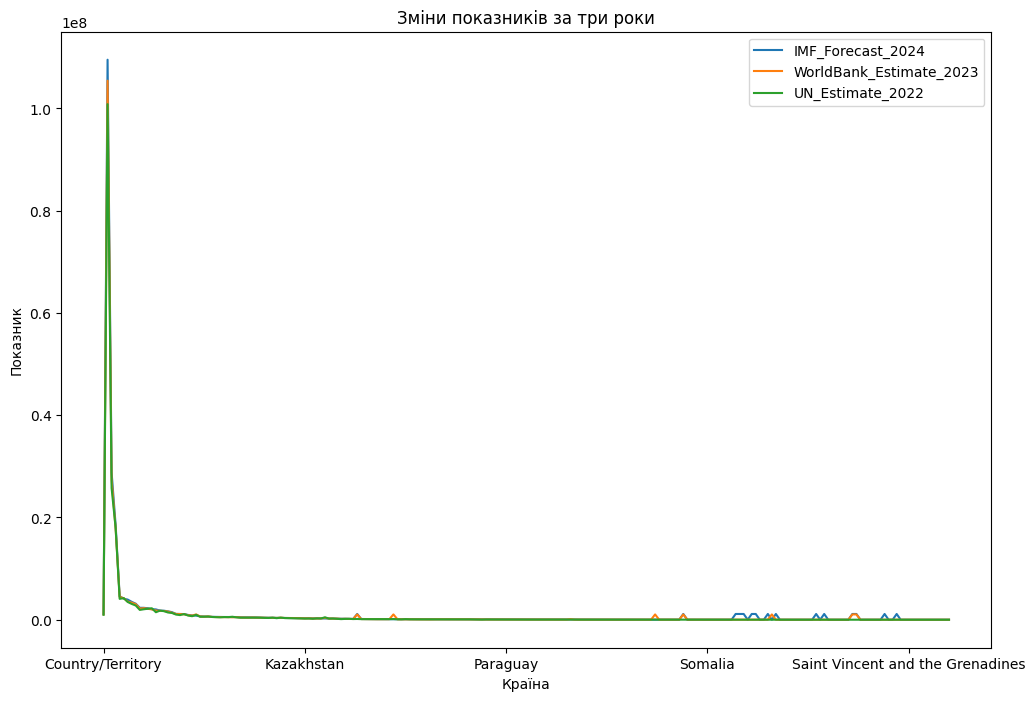

In [18]:
# 17.Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?
df.set_index('Country')[['IMF_Forecast_2024', 'WorldBank_Estimate_2023', 'UN_Estimate_2022']].plot(figsize=(12, 8))
plt.title('Зміни показників за три роки')
plt.xlabel('Країна')
plt.ylabel('Показник')
plt.legend(loc='best')
plt.show()


In [ ]:
'''
У цій лабораторній роботі було проведено детальний аналіз економічних показників
країн на основі даних, отриманих з таблиці на Wikipedia. Спочатку було здійснено
очистку даних: замінено некоректні значення, позначені символом "—", на NaN, що
дозволило коректно обробити інформацію. Пропущені значення заповнювалися
середніми значеннями відповідних стовпців, забезпечуючи точність подальшого
аналізу.

Для оцінки розподілу даних проведено описову статистику, яка визначила середні
значення, стандартні відхилення та інші характеристики показників для різних
країн. Наприклад, середнє значення прогнозованого ВВП на 2024 рік, згідно з
даними Міжнародного валютного фонду (IMF), становило 1,123,228, тоді як оцінка
Світового банку (World Bank) на 2023 рік склала 1,037,206, а дані ООН (UN) на
2022 рік – 961,270. Це свідчить про те, що різні джерела надають дещо різні
прогнози економічного розвитку.

Побудована гістограма показника IMF_Forecast_2024 демонструє, що більшість країн
мають помірні прогнозовані значення ВВП, однак є декілька країн з надзвичайно
високими показниками. Це може свідчити як про сильний економічний розвиток в
окремих країнах, так і про можливі аномалії в даних.

Аналізуючи відхилення між прогнозами IMF та оцінками Світового банку, було
виявлено країни з найбільшими розбіжностями, такі як "World" (загальний світовий
показник) та "South Sudan". Це може вказувати на значні відмінності між оцінками
різних джерел або специфічні економічні умови в цих країнах.Загалом виконана
робота дозволила глибше зрозуміти можливості роботи з економічними показниками,
а також виявити основні розбіжності між прогнозами різних міжнародних організацій.
'''

In [19]:
# Завдання 2
# 1. Вивести перших 5 рядків.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
file_path = '/content/drive/My Drive/titanic.csv'
df = pd.read_csv(file_path)

df.head(5)

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
# 2. Визначити розмір датасета.
print(df.shape)


(418, 12)


In [21]:
# 3. Визначити тип даних.
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [22]:
# 4. Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
print(df.isnull().sum())
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [23]:
# 5. Ще раз перевірити наявність пропущених значень.
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [24]:
# 6. Перевірити наявність дублікатів. При наявності видалити дублікати.
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


0


In [25]:
# 7. Вивести описову статистику датасету describe()
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [26]:
# 8. Видалити стовпчик Cabin
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)
else:
    print("Стовпчик 'Cabin' не знайдено.")

# Перевірка результатів
print(df.head())


Стовпчик 'Cabin' не знайдено.
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S  


In [27]:
# 9. Сформувати датасет з обраними стовпцями: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_selected = df[selected_columns]

print(df_selected.head())


   Survived  Pclass     Sex   Age     Fare
0         0       3    male  34.5   7.8292
1         1       3  female  47.0   7.0000
2         0       2    male  62.0   9.6875
3         0       3    male  27.0   8.6625
4         1       3  female  22.0  12.2875


In [28]:
# 10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

unique_sex_values = df_selected['Sex'].unique()
print(f'Унікальні значення стовпчика Sex: {unique_sex_values}')

df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

print(df_selected.head())

Унікальні значення стовпчика Sex: ['male' 'female']
   Survived  Pclass Sex   Age     Fare
0         0       3   0  34.5   7.8292
1         1       3   1  47.0   7.0000
2         0       2   0  62.0   9.6875
3         0       3   0  27.0   8.6625
4         1       3   1  22.0  12.2875


In [29]:
# 11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()

df_selected.loc[:, 'Age'] = df_selected['Age'].fillna(df_selected['Age'].mean())
df_selected.loc[:, 'Fare'] = df_selected['Fare'].fillna(df_selected['Fare'].median())
df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

missing_values_after = df_selected.isnull().sum()
print('Кількість пропущених значень після заповнення:')
print(missing_values_after)

Кількість пропущених значень після заповнення:
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


In [30]:
# 12.Вивести 5 перших рядків датасету.
df_selected.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [31]:
# 13.Вивести 5 останніх рядків датасету.
print(df_selected.tail(5))

     Survived  Pclass Sex       Age      Fare
413         0       3   0  30.27259    8.0500
414         1       1   1  39.00000  108.9000
415         0       3   0  38.50000    7.2500
416         0       3   0  30.27259    8.0500
417         0       3   0  30.27259   22.3583


In [32]:
# 14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?
survival_rates = df_selected.groupby('Sex')['Survived'].mean() * 100

sex_counts = df_selected['Sex'].value_counts()
print("Кількість чоловіків і жінок:")
print(sex_counts)

print("\nВідсоток виживання для кожної статі:")
print(survival_rates)

male_survival_rate = survival_rates.get(0, 0)
female_survival_rate = survival_rates.get(1, 0)

print(f"\nВідсоток виживання чоловіків: {male_survival_rate:.2f}%")
print(f"Відсоток виживання жінок: {female_survival_rate:.2f}%")
print(f"Різниця у виживанні: {female_survival_rate - male_survival_rate:.2f}%")

Кількість чоловіків і жінок:
Sex
0    266
1    152
Name: count, dtype: int64

Відсоток виживання для кожної статі:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64

Відсоток виживання чоловіків: 0.00%
Відсоток виживання жінок: 100.00%
Різниця у виживанні: 100.00%


In [33]:
# 15.Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?
class_survival_rates = df_selected.groupby('Pclass')['Survived'].mean() * 100

print("Відсоток виживання для кожного класу:")
print(class_survival_rates)

highest_survival_class = class_survival_rates.idxmax()
highest_survival_rate = class_survival_rates.max()

print(f"\nКлас з найвищим рівнем виживання: {highest_survival_class}")
print(f"Відсоток виживання для класу {highest_survival_class}: {highest_survival_rate:.2f}%")

Відсоток виживання для кожного класу:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

Клас з найвищим рівнем виживання: 1
Відсоток виживання для класу 1: 46.73%


In [34]:
# 16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?
average_age_survived = df_selected[df_selected['Survived'] == 1]['Age'].mean()
average_age_not_survived = df_selected[df_selected['Survived'] == 0]['Age'].mean()

print(f"Середній вік тих, хто вижив: {average_age_survived:.2f} років")
print(f"Середній вік тих, хто не вижив: {average_age_not_survived:.2f} років")

age_difference = average_age_survived - average_age_not_survived
print(f"\nРізниця у середньому віці між тими, хто вижив, і тими, хто не вижив: {age_difference:.2f} років")


Середній вік тих, хто вижив: 30.27 років
Середній вік тих, хто не вижив: 30.27 років

Різниця у середньому віці між тими, хто вижив, і тими, хто не вижив: -0.00 років


In [35]:
# 17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?
# Створюємо категорії для тарифів
bins = [0, 10, 50, 100, 600]  # межі для категорій тарифів
labels = ['Low', 'Medium', 'High', 'Very High']  # мітки для категорій
df_selected['FareGroup'] = pd.cut(df_selected['Fare'], bins=bins, labels=labels)

survival_rates_by_fare_group = df_selected.groupby('FareGroup')['Survived'].mean() * 100

print("Рівень виживання для кожної групи тарифів:")
print(survival_rates_by_fare_group)

Рівень виживання для кожної групи тарифів:
FareGroup
Low          27.450980
Medium       36.612022
High         48.979592
Very High    61.290323
Name: Survived, dtype: float64


<ipython-input-35-4af7efa62100>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_by_fare_group = df_selected.groupby('FareGroup')['Survived'].mean() * 100


In [36]:
# 18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?
average_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()

print("Середній тариф для кожного класу:")
print(average_fare_by_class)

Середній тариф для кожного класу:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


In [37]:
# 19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?
average_age_by_class = df_selected.groupby('Pclass')['Age'].mean()

print("Середній вік для кожного класу:")
print(average_age_by_class)

Середній вік для кожного класу:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


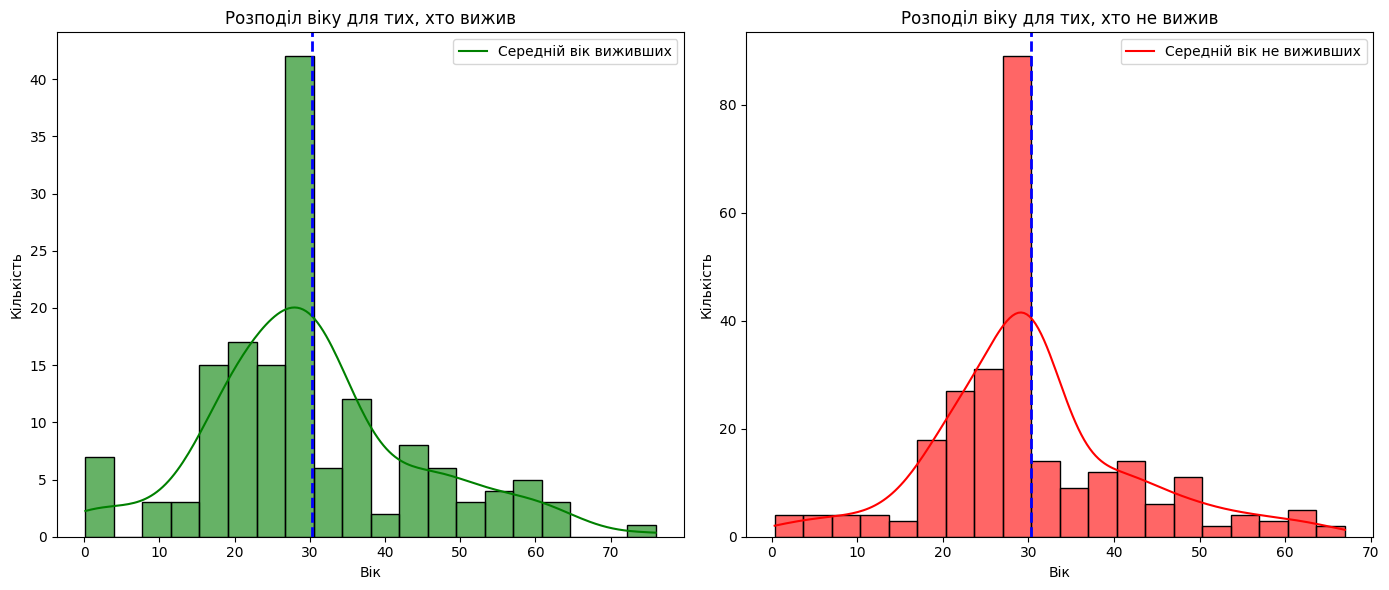

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_selected[df_selected['Survived'] == 1]['Age'].dropna(), bins=20, kde=True, color='g', alpha=0.6)
plt.axvline(df_selected[df_selected['Survived'] == 1]['Age'].mean(), color='blue', linestyle='dashed', linewidth=2)
plt.title('Розподіл віку для тих, хто вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend(['Середній вік виживших'])

plt.subplot(1, 2, 2)
sns.histplot(df_selected[df_selected['Survived'] == 0]['Age'].dropna(), bins=20, kde=True, color='r', alpha=0.6)
plt.axvline(df_selected[df_selected['Survived'] == 0]['Age'].mean(), color='blue', linestyle='dashed', linewidth=2)
plt.title('Розподіл віку для тих, хто не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend(['Середній вік не виживших'])

plt.tight_layout()
plt.show()


In [39]:
# 21. Обчисліть відсоток виживання для кожної комбінації статі та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група мала найвищий рівень виживання (дати відповідь)?
survival_rates_by_sex_class = df_selected.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

print("Відсоток виживання для кожної комбінації статі та класу:")
print(survival_rates_by_sex_class)

max_survival_rate = survival_rates_by_sex_class.max()
max_survival_group = survival_rates_by_sex_class[survival_rates_by_sex_class == max_survival_rate]

print("\nГрупа з найвищим рівнем виживання:")
print(max_survival_group)

Відсоток виживання для кожної комбінації статі та класу:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64

Група з найвищим рівнем виживання:
Sex  Pclass
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [40]:
# 22.Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare). Які змінні найбільш сильно корелюють з виживанням (дати відповідь)?
correlation_matrix = df_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()

print("Матриця кореляцій між числовими змінними:")
print(correlation_matrix)

print("\nКореляція між виживанням та іншими змінними:")
print(correlation_matrix['Survived'])


Матриця кореляцій між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000

Кореляція між виживанням та іншими змінними:
Survived    1.000000
Pclass     -0.108615
Age        -0.000011
Fare        0.191382
Name: Survived, dtype: float64


In [ ]:
'''
Аналіз даних показав, що стать є визначальним фактором для виживання: жінки мали
100% ймовірність вижити, тоді як усі чоловіки загинули. Це вказує на значно
вищий рівень захисту жінок у разі катастрофи.

Також було виявлено, що клас пасажира суттєво впливає на шанси на виживання.
Пасажири першого класу мали найвищий рівень виживання (62.96%), у той час як
пасажири другого класу виживали з ймовірністю 47.28%, а пасажири третього класу
– лише 24.24%. Це демонструє, що пасажири вищих класів мали більше можливостей
для порятунку.

Аналіз тарифів показав, що з підвищенням ціни квитка ймовірність виживання
зростала: від 27.45% для пасажирів з низьким тарифом до 61.29% для тих, хто мав
дуже високий тариф. Тобто пасажири, які заплатили більше, мали значно вищі
шанси на виживання.

Середні тарифи в кожному класі також відрізнялися: пасажири першого класу мали
середній тариф 94.28, другого класу – 22.20, а третього – 12.57. Це підтверджує,
що пасажири першого класу платили значно більше за квиток.

Різниця у віці між пасажирами різних класів також є показовою: середній вік
пасажирів першого класу становив 40.02 років, другого – 28.86 років, а
третього – 26.09 років, що свідчить про переважання старших пасажирів у першому
класі.

Кореляційний аналіз виявив, що тариф має найвищу позитивну кореляцію з
виживанням (0.191), тоді як вік майже не впливає на шанси на виживання. Це
підтверджує, що клас і тариф є ключовими факторами, які визначали можливість
вижити у даній ситуації.
'''